<a href="https://colab.research.google.com/github/Deepsphere-AI/DSAI_Python_Programming/blob/main/Unit-16/Python%20for%20Deep%20Learning/Program%20347-%20CSLAB_DEEP_LEARNING_KMEANS_CLUSTERING_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
non-resource variables are not supported in the long term


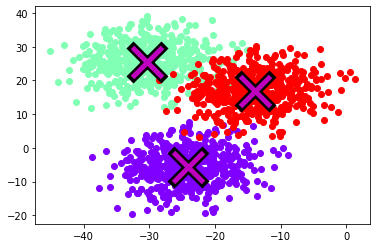

In [ ]:

# *********************************************************************************************************************
  
  # File Name 	:   CSLAB_DEEP_LEARNNG_KMEANS_CLUSTERING_V1
  # Purpose 	:   A Program in Python for Kmeans Clustering - Deep Learning
  # Author	:   Deepsphere.ai
  # Reviewer 	:   Jothi Periasamy
  # Date 	:   28/10/2022
  # Version	:   1.0	
  
# ***********************************************************************************************************************

## Program Description : Program for Kmeans Clustering - Deep Learning in Python

## Python Development Environment & Runtime - Python, Anaconda, Tensorflow, Tensorboard

import tensorflow.compat.v1 as vAR_tf

vAR_tf.disable_v2_behavior() 

import numpy as vAR_np

vAR_CSLAB_seed = 700

def vAR_CSLAB_create_samples(vAR_CSLAB_n_clusters, vAR_CSLAB_n_samples_per_cluster, vAR_CSLAB_n_features, vAR_CSLAB_embiggen_factor, vAR_CSLAB_seed):
    vAR_np.random.seed(vAR_CSLAB_seed)
    vAR_CSLAB_slices = []
    vAR_CSLAB_centroids = []
        
    # Create samples for each cluster
    for i in range(vAR_CSLAB_n_clusters):
        vAR_CSLAB_samples = vAR_tf.random_normal((vAR_CSLAB_n_samples_per_cluster, vAR_CSLAB_n_features),
                                   mean=0.0, stddev=5.0, dtype=vAR_tf.float32, seed=vAR_CSLAB_seed, name="cluster_{}".format(i))
        
        vAR_CSLAB_current_centroid = (vAR_np.random.random((1, vAR_CSLAB_n_features)) * vAR_CSLAB_embiggen_factor) - (vAR_CSLAB_embiggen_factor/2)
        
        vAR_CSLAB_centroids.append(vAR_CSLAB_current_centroid)
        
        vAR_CSLAB_samples += vAR_CSLAB_current_centroid
        
        vAR_CSLAB_slices.append(vAR_CSLAB_samples)
        
    # Create a big "samples" dataset
    vAR_CSLAB_samples = vAR_tf.concat(vAR_CSLAB_slices, 0, name='samples')
    vAR_CSLAB_centroids = vAR_tf.concat(vAR_CSLAB_centroids, 0, name='centroids')
    return vAR_CSLAB_centroids, vAR_CSLAB_samples

import matplotlib.pyplot as vAR_plt
%matplotlib inline

def vAR_CSLAB_plot_clusters(vAR_CSLAB_all_samples, vAR_CSLAB_centroids, vAR_CSLAB_n_samples_per_cluster):
     
    #Plot out the different clusters
     #Choose a different colour for each cluster
    vAR_CSLAB_colour = vAR_plt.cm.rainbow(vAR_np.linspace(0,1,len(vAR_CSLAB_centroids)))
    for i, vAR_CSLAB_centroid in enumerate(vAR_CSLAB_centroids):
        vAR_CSLAB_samples = vAR_CSLAB_all_samples[i*vAR_CSLAB_n_samples_per_cluster:(i+1)*vAR_CSLAB_n_samples_per_cluster]
        vAR_plt.scatter(vAR_CSLAB_samples[:,0], vAR_CSLAB_samples[:,1], c=vAR_CSLAB_colour[i])
         #Grab just the samples fpr the given cluster and plot them out with a new colour
         #Also plot centroid
        vAR_plt.plot(vAR_CSLAB_centroid[0], vAR_CSLAB_centroid[1], markersize=35, marker="x", color='k', mew=10)
        vAR_plt.plot(vAR_CSLAB_centroid[0], vAR_CSLAB_centroid[1], markersize=30, marker="x", color='m', mew=5)
    vAR_plt.show()
    
vAR_CSLAB_n_features = 2
vAR_CSLAB_n_clusters = 3
vAR_CSLAB_n_samples_per_cluster = 500
vAR_CSLAB_vAR_CSLAB_seed = 700
vAR_CSLAB_embiggen_factor = 70

vAR_CSLAB_centroids, vAR_CSLAB_samples = vAR_CSLAB_create_samples(vAR_CSLAB_n_clusters, vAR_CSLAB_n_samples_per_cluster, vAR_CSLAB_n_features, vAR_CSLAB_embiggen_factor, vAR_CSLAB_seed)

vAR_CSLAB_model = vAR_tf.global_variables_initializer()
with vAR_tf.Session() as session:
    vAR_CSLAB_sample_values = session.run(vAR_CSLAB_samples)
    vAR_CSLAB_centroid_values = session.run(vAR_CSLAB_centroids)
    
    vAR_CSLAB_plot_clusters(vAR_CSLAB_sample_values, vAR_CSLAB_centroid_values, vAR_CSLAB_n_samples_per_cluster)
    
# ****************************************************************************************************************************
#   Disclaimer.

# We are providing this code block strictly for learning and researching, this is not a production
# ready code. We have no liability on this particular code under any circumstances; users should use
# this code on their own risk. All software, hardware and othr products that are referenced in these 
# materials belong to the respective vendor who developed or who owns this product.

# ****************************************************************************************************************************
  

**Code Explanation**

This code generates and plots 3 clusters of 2-dimensional data points, with each cluster having 500 samples.

The code starts by importing the TensorFlow library and disabling v2 behavior. It then imports Numpy, which is a numerical computing library that is used to generate random numbers.

The vAR_CSLAB_create_samples function generates the samples for each cluster. The function takes 5 parameters: vAR_CSLAB_n_clusters, vAR_CSLAB_n_samples_per_cluster, vAR_CSLAB_n_features, vAR_CSLAB_embiggen_factor, and vAR_CSLAB_seed. The first three parameters determine the number of clusters, the number of samples per cluster, and the number of features for each sample, respectively. The vAR_CSLAB_embiggen_factor parameter is used to shift the centroid of the cluster, and the vAR_CSLAB_seed parameter is used to set the random seed for Numpy's random number generator.

In the vAR_CSLAB_create_samples function, the Numpy random number generator is first seeded with the vAR_CSLAB_seed value. Then, for each cluster, the code generates a set of random samples using TensorFlow's random_normal function. The mean of the samples is set to 0 and the standard deviation is set to 5.

Next, the code generates a random centroid for each cluster. The centroid is generated by first generating a random vector of size (1, vAR_CSLAB_n_features) using Numpy's random.random function, and then scaling and shifting the vector to the desired range.

Finally, the code concatenates all the samples and centroids into two big arrays, which are returned by the function.

The vAR_CSLAB_plot_clusters function is used to plot the generated samples and centroids. The function takes three parameters: vAR_CSLAB_all_samples, vAR_CSLAB_centroids, and vAR_CSLAB_n_samples_per_cluster. The vAR_CSLAB_all_samples parameter is an array containing all the samples, while the vAR_CSLAB_centroids parameter is an array containing the centroids. The vAR_CSLAB_n_samples_per_cluster parameter is used to determine the number of samples in each cluster.

The function uses the matplotlib library to plot the samples and centroids. It first assigns a different color to each cluster, and then plots the samples for each cluster using a scatter plot. The centroid of each cluster is plotted using two crosses, one with a black color and another with a magenta color, for visual emphasis. Finally, the function displays the plot using the show method.

The code then sets the parameters for the number of features, clusters, samples per cluster, random seed, and embiggen factor. It then calls the vAR_CSLAB_create_samples function to generate the samples and centroids, and runs a TensorFlow session to compute the values of the generated data. Finally, it calls the vAR_CSLAB_plot_clusters function to plot the generated data.